<a href="https://colab.research.google.com/github/Hamid-Mofidi/Deep_Learning_with_Python_intro/blob/main/MSF_on_Lorenz/MSF_Lorenz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

6.848453794046506 7.279209341012151 24.3971536128102
[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42000000000000004, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48000000000000004, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.7100000000000001, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.8400000000000001, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.9600000000000001, 0.97, 0.98, 

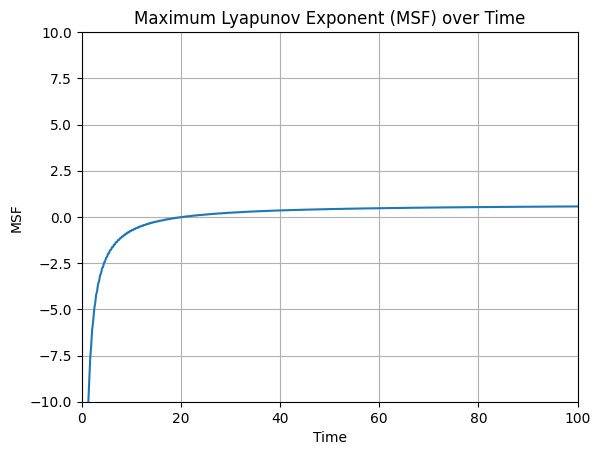

In [5]:
# Define the parameters
sigma = 10
rho = 28
beta = 8/3
# Define the Lorenz system without coupling
def lorenz (x, y, z):
  dx_dt = sigma * (y - x)
  dy_dt = x * (rho - z) - y
  dz_dt = x * y - beta * z
  return dx_dt, dy_dt, dz_dt

# Define the time duration and step size
t_start = 0
t_end = 100
dt = 0.01

# Initialize the state variables
x = 1.0
y = 1.0
z = 1.0

# Perform the integration and find the steady state solution
for t in np.arange (t_start, t_end, dt):
  # Compute the Lorenz system with Euler's method
  dx_dt, dy_dt, dz_dt = lorenz (x, y, z)
  x += dx_dt * dt
  y += dy_dt * dt
  z += dz_dt * dt

# Print the synchronized state values
print (x, y, z)


epsilon = 0.001  # Small perturbation parameter

# Define the coupling matrix
C = np.array([[-sigma, sigma, 0],
              [rho - z, -1, -x],
              [y, x, -beta]])

# Define the perturbation matrix
P = np.array([[1, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])


# Initialize the perturbation vector
s_perturb = np.array([1e-6, 0.0, 0.0]) # Set a small non-zero initial perturbation


# Create lists to store time and MSF values
time = []
msf_values = []

# Perform the integration and compute MSF
for t in np.arange(t_start + dt, t_end, dt):
    # Compute the mode equation with perturbation
    dS_dt = C @ s_perturb + epsilon * P @ s_perturb

    # Update the perturbation vector using Euler's method
    s_perturb += dS_dt * dt

    # Compute the magnitude of the perturbation vector
    magnitude = la.norm(s_perturb)

    # Check if magnitude is close to zero
    if magnitude < 1e-12:
        msf = 0  # Assign a default value for msf
    else:
        # Calculate the MSF value (logarithmic growth rate)
        msf = np.log(magnitude) / t

    # Calculate the MSF value (logarithmic growth rate)
    msf = np.log (magnitude) / t
    #msf = np.log(magnitude) / (t + 1e-6) # Avoid dividing by zero

    # Append the current time and MSF value to the lists
    time.append(t)
    msf_values.append(msf)

print(time)
print(msf_values)

# Plotting the MSF
plt.plot(time, msf_values)
plt.xlabel('Time')
plt.ylabel('MSF')
plt.title('Maximum Lyapunov Exponent (MSF) over Time')
plt.grid(True)
plt.axis([0, 100, -10, 10]) # Adjust the axis limits
plt.show()

 The figure shows that the MSF is negative on the time interval (0, 20) and then it is positive. This means that the perturbation vector is decaying on the interval (0, 20) and then it is growing on the interval (20, 100). This suggests that the system is stable on the interval (0, 20) and then it becomes unstable on the interval (20, 100).

•  We should not conclude that the oscillations synchronize on the interval (0, 20) and then the synchronization is not guaranteed. The MSF only measures the sensitivity of the system to small perturbations, not the synchronization of the oscillations. To measure synchronization, we need to use other indicators, such as correlation or phase difference.

•  The t here is the time variable that ranges from 0 to 100. The epsilon lambda i here is the MSF value that measures the logarithmic growth rate of the perturbation vector. It is also called the maximum Lyapunov exponent or the largest eigenvalue of the coupling matrix.
